**Ardigen Recruitment Task 1** 


Problem 1: tell the name of the country for a flag given

1.   The app you will build shall take an image of a national flag and return the name of the country to which this flag belongs to. Use Wikipedia for reference flags (https://en.wikipedia.org/wiki/Gallery_of_sovereign_state_flags. 
2.   You can assume that the flag image is transformed by projective transform only, however, there can be some color/focus/brightness perturbation.

3.   To fasten the database creation, you can use wikipedia Python package
(https://pypi.org/project/wikipedia/).


Please omit using deep learning algorithms.



In [ ]:
!pip install wikipedia cairosvg
import wikipedia
import urllib.request as req
import re
from os import listdir, rename, path
import matplotlib.pyplot as plt
import cairosvg
import imutils
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=853ac5522fa1116780f091a8b99247b369d915db9069ccadc9f7fd8b02934135
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89667 sha256=030d228d71a399b468eea0b67e22844b2c97c4b78dc3ff549caa05ad931275b2
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built wikipedia cairocffi


In [ ]:
def preparation_data(svg_flags_dir):
  flags = wikipedia.page("Gallery of sovereign state flags")
  img_links = list(dict.fromkeys([ x for x in flags.images if "Flag_of_" in x ]))
  for imageurl in img_links:
    country_name = re.search(r"F.*\.svg$", imageurl).group(0)
    print(f'Download {country_name} flag')
    req.urlretrieve(imageurl, path.join(svg_flags_dir, country_name))

In [ ]:
def flag_rename(svg_flags_dir):
  to_rename = [ flag for flag in listdir(svg_flags_dir) if '%' in flag]
  for flag in to_rename:

    ## Gdybym miał Python3.10 to Pattern matching jak złoto. Z drugiej strony można to zrobić ręcznie bez kodu.
    if flag == 'Flag_of_Australia_%28converted%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Australia.svg'))
    elif flag == 'Flag_of_Belgium_%28civil%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Belgium.svg'))
    elif flag == 'Flag_of_C%C3%B4te_d%27Ivoire.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Ivory_Coast.svg'))
    elif flag == 'Flag_of_Canada_%28Pantone%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Canada.svg'))
    elif flag == 'Flag_of_the_People%27s_Republic_of_China.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_China.svg'))
    elif flag == 'Flag_of_Transnistria_%28state%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Transnistria.svg'))
    elif flag == 'Flag_of_Venezuela_%28state%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Venezuela'))
    elif flag == 'Flag_of_Costa_Rica_%28state%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Costa_Rica'))
    elif flag == 'Flag_of_Peru_%28state%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Peru'))
    elif flag == 'Flag_of_Afghanistan_%282013%E2%80%932021%29.svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Afghanistan'))
    elif flag == 'Flag_of_Afghanistan_(2013–2021).svg':
      rename(path.join(svg_flags_dir, flag), path.join(svg_flags_dir, 'Flag_of_Afghanistan'))
    else:
      print(f'ERROR, exist {flag}')

In [ ]:
def to_png_converter(svg_flags_dir,png_flags_dir):
  for svg_flag in listdir(svg_flags_dir):
      cairosvg.svg2png(url = path.join(svg_flags_dir, svg_flag), write_to = path.join(png_flags_dir, svg_flag.split('.')[0] + '.png'))

In [ ]:
def get_name_country_from_file(flag):
    country = flag.split('Flag_of_')[1].split('.')[0]
    
    if 'The_' in country: country = country.replace('The_','')

    if 'the_' in country: country = country.replace('the_','')

    return country

In [ ]:
def get_shapes_number(png_flags_dir):
    country = []
    cont_no = []
    for flag in listdir(png_flags_dir):
        image = cv2.imread(path.join(png_flags_dir, flag))
        image = imutils.resize(image, height = 300)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


## Canny najlepiej się sprawdzi - Sobel będzie gorszy. Z racji że mamy flagi tj. Brazylia czy Chiny to trzeba bardziej dokladnie kontury znaleźć
## Inna opcja to jakieś ANN zaimplementować. Ale w zdaniu nie można

        edged = cv2.Canny(gray, 1, 49)
        edged[:2,:] = 255
        edged[-2:,:] = 255
        edged[:,:2] = 255
        edged[:,-2:] = 255

        cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        cnts = np.array(sorted(cnts, key = cv2.contourArea, reverse = True))
        
        country.append(get_name_country_from_file(flag))
        cont_no.append(len(cnts))
        
    return country, cont_no

Maski dla kolorów w palecie HSV.

**TO DO:**
- Dodać mask dla rozowego, błękitnego oraz orange żeby lepiej rozróżniać kolory podobnych flag tj. Czad i Rumunia.

In [ ]:
def get_colours(png_flags_dir,df):
    
    df = extend_df(df)
    for flag in listdir(png_flags_dir):
        
        masks = generate_mask(path.join(png_flags_dir, flag))

        country = get_name_country_from_file(flag)
        df.at[country, 'colour_number'] = masks[6]
        df.at[country, 'black'] = masks[0]
        df.at[country, 'red'] = masks[1]
        df.at[country, 'yellow'] = masks[2]
        df.at[country, 'green'] = masks[3]
        df.at[country, 'blue'] = masks[4]
        df.at[country, 'white'] = masks[5]
        
    df['colour_number'] = df['colour_number'].astype('int32')

In [ ]:
def generate_mask(flag_path):
  
    image = cv2.imread(flag_path)
    hsv_image = cv2.resize(image, (300, 300), interpolation = cv2.INTER_AREA)
    hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_BGR2HSV)

    mask_black = cv2.inRange(hsv_image, (0,0,0), (180,255,40))
    mask_red = cv2.inRange(hsv_image, (0,40,40), (15,255,255))
    mask_yellow = cv2.inRange(hsv_image, (15,40,40), (40,255,255))
    mask_green = cv2.inRange(hsv_image, (40,40,40), (70,255,255))
    mask_blue = cv2.inRange(hsv_image, (70,40,40), (120,255,255))
    mask_white = cv2.inRange(hsv_image, (0,0,200), (180,30,255))

    colours = np.array([mask_black, mask_red, mask_yellow, mask_green, mask_blue, mask_white])
    colour_counter = 0
    for colour in colours:

        if colour.any() == False:
          continue
        else:
          colour_counter = colour_counter + 1

    return [mask_black,mask_red,mask_yellow,mask_green,mask_blue,mask_white,colour_counter,colours]

In [ ]:
def extend_df(df):
  df['colour_number'] = 0
  df['black'] = 0
  df['black'] = df['black'].astype(object)
  df['red'] = 0
  df['red'] = df['red'].astype(object)
  df['yellow'] = 0
  df['yellow'] = df['yellow'].astype(object)
  df['green'] = 0
  df['green'] = df['green'].astype(object)
  df['blue'] = 0
  df['blue'] = df['blue'].astype(object)
  df['white'] = 0
  df['white'] = df['white'].astype(object)
  
  return df

In [ ]:
# coś robie zle

#def extend_df(df):

#    col_list = ['black', 'red', 'yellow', 'green', 'blue', 'white','colour_number']

#    for col in col_list:
#      df[col] = 0
#      df[col] = df[col].astype(object)
#      if col == 'colour_number':
#        df[col] = df[col].astype(int32)


#    return df


IndentationError: ignored

In [ ]:
def flag_recognision(flag_to_recognize):
  masks = generate_mask(flag_to_recognize)
  colours = masks[7]
  df['mse'] = 0.0
  for index, row in df.iterrows():
    mses = np.empty(6)
    sum_mse = 0
    _colours_array = np.array(df.loc[index][2:8])
    for tone in range(len(_colours_array)):
        mses[tone] = mean_squared_error(_colours_array[tone],colours[tone])
        sum_mse = sum_mse + mses[tone]
    df.at[index, 'mse'] = sum_mse

  row = df.loc[df['mse'] == min(df['mse'])]
  name_country_based_on_flag = row['mse'].index.values[0]
  print(f"Predicted: {name_country_based_on_flag}")
  return name_country_based_on_flag

**Właściwa część porgramu**

In [ ]:
!mkdir oryginal_flags convert_flags_png

In [ ]:
# Przygotowanie i zapisanie danych
svg_flags_dir_path = 'oryginal_flags'
png_flags_dir_path = 'convert_flags_png'


preparation_data(svg_flags_dir_path)
flag_rename(svg_flags_dir_path)
to_png_converter(svg_flags_dir_path,png_flags_dir_path)

Download Flag_of_Afghanistan_%282013%E2%80%932021%29.svg flag
Download Flag_of_Albania.svg flag
Download Flag_of_Algeria.svg flag
Download Flag_of_Andorra.svg flag
Download Flag_of_Angola.svg flag
Download Flag_of_Antigua_and_Barbuda.svg flag
Download Flag_of_Argentina.svg flag
Download Flag_of_Armenia.svg flag
Download Flag_of_Artsakh.svg flag
Download Flag_of_Australia_%28converted%29.svg flag
Download Flag_of_Austria.svg flag
Download Flag_of_Azerbaijan.svg flag
Download Flag_of_Bahrain.svg flag
Download Flag_of_Bangladesh.svg flag
Download Flag_of_Barbados.svg flag
Download Flag_of_Belarus.svg flag
Download Flag_of_Belgium_%28civil%29.svg flag
Download Flag_of_Belize.svg flag
Download Flag_of_Benin.svg flag
Download Flag_of_Bhutan.svg flag
Download Flag_of_Bosnia_and_Herzegovina.svg flag
Download Flag_of_Botswana.svg flag
Download Flag_of_Brunei.svg flag
Download Flag_of_Bulgaria.svg flag
Download Flag_of_Burkina_Faso.svg flag
Download Flag_of_Burundi.svg flag
Download Flag_of_Camb

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['flag']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Oryginal: San_Marino


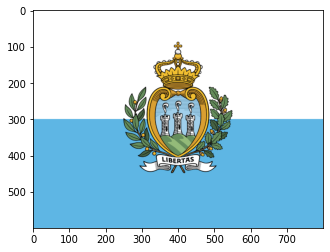

             cont_no  ...  mse
San_Marino       380  ...  0.0
Qatar             15  ...  0.0
Denmark            6  ...  0.0
Zambia           134  ...  0.0
India             94  ...  0.0
...              ...  ...  ...
Uganda            34  ...  0.0
Netherlands        4  ...  0.0
Cameroon           5  ...  0.0
Israel            22  ...  0.0
Bulgaria           4  ...  0.0

[205 rows x 9 columns]
             cont_no  ...     mse
San_Marino       380  ...  0.0000
Qatar             15  ...  0.9847
Denmark            6  ...  0.0000
Zambia           134  ...  0.0000
India             94  ...  0.0000
...              ...  ...     ...
Uganda            34  ...  0.0000
Netherlands        4  ...  0.0000
Cameroon           5  ...  0.0000
Israel            22  ...  0.0000
Bulgaria           4  ...  0.0000

[205 rows x 9 columns]
             cont_no  ...     mse
San_Marino       380  ...  0.0000
Qatar             15  ...  0.9847
Denmark            6  ...  1.0340
Zambia           134  ...  0.0000
In

KeyboardInterrupt: ignored

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


country, cont_no = get_shapes_number(png_flags_dir_path)
df = pd.DataFrame(cont_no, columns=['cont_no'], index=country)

get_colours(png_flags_dir_path,df)

yes = 0 ;

all_country = len(listdir(png_flags_dir_path))

for flag in listdir(png_flags_dir_path):
  oryginal = str(get_name_country_from_file(flag))
  print(f'Oryginal: {get_name_country_from_file(flag)}')
  img = mpimg.imread(path.join(png_flags_dir_path, flag))
  imgplot = plt.imshow(img)
  plt.show()
  predicted = flag_recognision(path.join(png_flags_dir_path, flag))
  print("=====\n")

